In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

auto_df = pd.read_csv('./Auto.data', delim_whitespace=True, na_values='?').dropna()

auto_df.head()

C:\Users\saqom\AppData\Local\Temp\ipykernel_21832\207565868.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_df = pd.read_csv('./Auto.data', delim_whitespace=True, na_values='?').dropna()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
# Predictor and response
X = auto_df['horsepower']
y = auto_df['mpg']

# Add intercept
X_const = sm.add_constant(X)

# Fit OLS regression model
lm = sm.OLS(y, X_const).fit()

# Display regression results summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           7.03e-81
Time:                        01:45:00   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

Relationship	Yes, highly statistically significant
Strength	Moderately strong: R² = 0.606
Direction	Negative relationship


In [12]:
new_hp = pd.DataFrame({'horsepower': [98]})
new_hp_const = sm.add_constant(new_hp, has_constant='add')
print(new_hp_const)
prediction_result = lm.get_prediction(new_hp_const)
prediction_summary = prediction_result.summary_frame(alpha=0.05)
print(prediction_summary)



   const  horsepower
0    1.0          98
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


Predicted mpg (mean) at horsepower = 98: 24.47 mpg (approximately)

95% Confidence Interval for mean mpg: (23.97, 24.96)

95% Prediction Interval for an individual car's mpg: (14.81, 34.12)

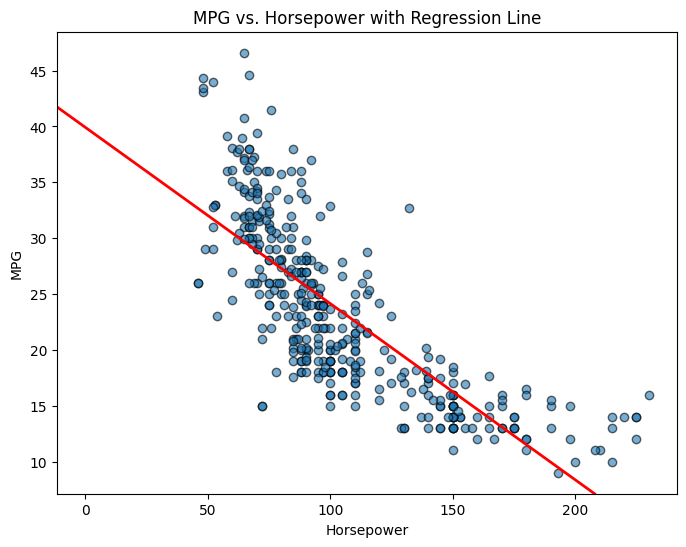

In [ ]:
X = auto_df['horsepower']
y = auto_df['mpg']

intercept, slope = lm.params['const'], lm.params['horsepower']

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y, alpha=0.6, edgecolors='k')

ax.axline(xy1=(0, intercept), slope=slope, color='red', linewidth=2)

ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('MPG vs. Horsepower with Regression Line')

plt.show()

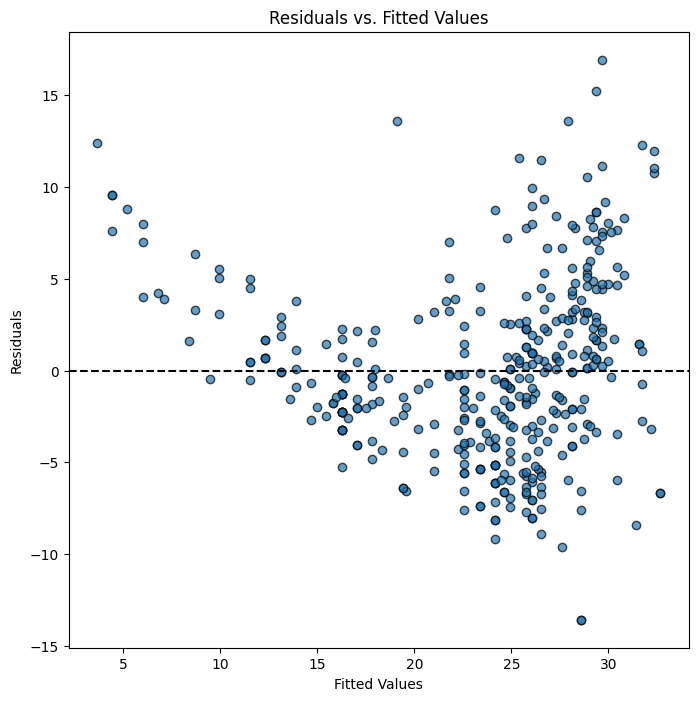

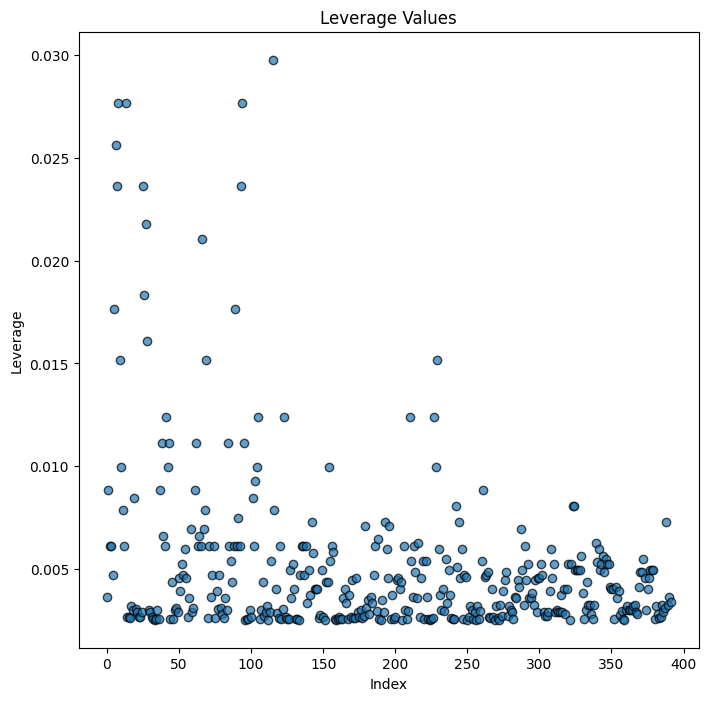

Index of the highest leverage point: 115


In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(lm.fittedvalues, lm.resid, alpha=0.7, edgecolors='k')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted Values')
ax.axhline(0, color='black', linestyle='--')
plt.show()

# 2. Leverage Plot
influence = lm.get_influence()
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(np.arange(len(leverage)), leverage, alpha=0.7, edgecolors='k')
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
ax.set_title('Leverage Values')
plt.show()

# Identify and print the index of the observation with the highest leverage
max_leverage_index = np.argmax(leverage)
print("Index of the highest leverage point:", max_leverage_index)